In [1]:
import os
import sys
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from database import DB
from analysis import MLP, xyFeature
from analysis.feature import past_feature, win_sum_feature, cum_win_sum_feature, cum_opp_win_rate_feature, normal

In [2]:
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None)

In [3]:
db = DB()
db.initialise()

temp_df = db.get_table('view_set_match_info_concat')

In [4]:
col_to_use = ['league_name', 'year', 'season', 'date', 'set_number', 
              'team_1', 'team_2', 'corresponding_team',
              'wdl', 'side', 'game_length','team_kills',
              'team_deaths','team_baron_kills', 'team_dragon_kills',
              'team_rift_kills', 'team_tower_kills', 'team_inhib_kills',
             'team_total_gold', 'team_minion_kills']
df = temp_df[col_to_use]
df = df.dropna(subset=col_to_use)
df['date'] = pd.to_datetime(df['date'])

In [5]:
gamelength_norm_cols = ['team_kills',
 'team_deaths','team_baron_kills',
 'team_dragon_kills','team_rift_kills',
 'team_total_gold','team_minion_kills']

min_max_cols = ['team_tower_kills', 'team_inhib_kills']

df[gamelength_norm_cols] = normal(df, gamelength_norm_cols, 'game_length')
df[min_max_cols] = normal(df, min_max_cols, 'minmax')

In [6]:
df = past_feature(df, gamelength_norm_cols+min_max_cols, game_past=3)

In [7]:
df = win_sum_feature(df, rolling_window=3)

In [8]:
df = cum_win_sum_feature(df)

In [9]:
df = cum_opp_win_rate_feature(df)

In [10]:
df

,league_name,year,season,date,set_number,team_1,team_2,corresponding_team,wdl,side,game_length,team_kills,team_deaths,team_baron_kills,team_dragon_kills,team_rift_kills,team_tower_kills,team_inhib_kills,team_total_gold,team_minion_kills,team_kills__1,team_deaths__1,team_baron_kills__1,team_dragon_kills__1,team_rift_kills__1,team_total_gold__1,team_minion_kills__1,team_tower_kills__1,team_inhib_kills__1,team_kills__2,team_deaths__2,team_baron_kills__2,team_dragon_kills__2,team_rift_kills__2,team_total_gold__2,team_minion_kills__2,team_tower_kills__2,team_inhib_kills__2,team_kills__3,team_deaths__3,team_baron_kills__3,team_dragon_kills__3,team_rift_kills__3,team_total_gold__3,team_minion_kills__3,team_tower_kills__3,team_inhib_kills__3,win_sum__3,cum_win_sum,opp_team,cum_opp_win_rate
0,BL,2020,spring,2020-01-21,1,Brussels Guardians,RSCA,Brussels Guardians,L,red,1539.0,0.116959,0.662768,0.000000,0.000000,0.000000,0.090909,0.0000,1512.670565,25.380117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RSCA,NaN
1,BL,2020,spring,2020-03-12,1,Brussels Guardians,RSCA,Brussels Guardians,W,red,1541.0,1.012330,0.233615,0.000000,0.155743,0.038936,0.636364,0.1250,1837.767683,19.195328,0.797342,1.036545,0.000000,0.079734,0.000000,1714.285714,18.657807,0.090909,0.0000,0.575758,0.121212,0.060606,0.060606,0.060606,1800.000000,22.151515,0.545455,0.0625,0.336735,0.673469,0.000000,0.030612,0.000000,1597.959184,24.673469,0.272727,0.0000,1.0,2.0,RSCA,0.000000
2,BL,2020,summer,2020-06-09,1,Brussels Guardians,RSCA,Brussels Guardians,W,red,2342.0,0.768574,0.204953,0.025619,0.076857,0.025619,0.909091,0.1875,1808.710504,21.673783,0.087591,0.496350,0.000000,0.029197,0.058394,1407.299270,22.248175,0.000000,0.0000,0.079947,0.719520,0.000000,0.000000,0.000000,1407.061959,25.063291,0.090909,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RSCA,0.500000
3,BL,2020,summer,2020-07-07,1,Brussels Guardians,RSCA,Brussels Guardians,L,blue,2273.0,0.316762,0.580730,0.000000,0.026397,0.026397,0.454545,0.0000,1763.308403,26.132864,0.147965,0.591862,0.000000,0.000000,0.036991,1505.548705,24.044390,0.272727,0.0000,0.419314,0.838628,0.000000,0.114358,0.000000,1459.974587,20.851334,0.000000,0.0000,0.325834,0.512025,0.023274,0.046548,0.023274,1717.610551,24.833204,0.454545,0.0625,0.0,2.0,RSCA,0.666667
4,BL,2020,spring,2020-01-21,1,Brussels Guardians,KV Mechelen,Brussels Guardians,W,blue,2119.0,0.736196,0.254837,0.056630,0.113261,0.028315,1.000000,0.1875,1950.920245,25.795186,0.116959,0.662768,0.000000,0.000000,0.000000,1512.670565,25.380117,0.090909,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,KV Mechelen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23459,VCS,2020,summer,2020-07-18,2,OverPower Esports,Percent Esports,Percent Esports,W,blue,1689.0,0.852575,0.497336,0.035524,0.106572,0.071048,0.727273,0.0625,2003.587922,23.836590,0.038911,0.622568,0.000000,0.000000,0.038911,1449.688716,27.782101,0.000000,0.0000,0.231023,0.726073,0.000000,0.000000,0.000000,1557.524752,25.280528,0.090909,0.0000,0.392299,0.435888,0.021794,0.087178,0.000000,1719.840174,23.603342,0.727273,0.0000,1.0,5.0,OverPower Esports,NaN
23460,VCS,2020,summer,2020-07-18,3,OverPower Esports,Percent Esports,Percent Esports,W,red,1503.0,0.518962,0.079840,0.000000,0.119760,0.039920,0.727273,0.0625,1900.838323,28.502994,0.852575,0.497336,0.035524,0.106572,0.071048,2003.587922,23.836590,0.727273,0.0625,0.038911,0.622568,0.000000,0.000000,0.038911,1449.688716,27.782101,0.000000,0.0000,0.231023,0.726073,0.000000,0.000000,0.000000,1557.524752,25.280528,0.090909,0.0000,0.0,6.0,OverPower Esports,1.000000
23461,VCS,2020,summer,2020-07-18,1,OverPower Esports,Percent Esports,Percent Esports,L,red,1759.0,0.545765,0.648096,0.068221,0.034110,0.000000,0.0909

In [12]:
df = df.dropna()
df

,league_name,year,season,date,set_number,team_1,team_2,corresponding_team,wdl,side,game_length,team_kills,team_deaths,team_baron_kills,team_dragon_kills,team_rift_kills,team_tower_kills,team_inhib_kills,team_total_gold,team_minion_kills,team_kills__1,team_deaths__1,team_baron_kills__1,team_dragon_kills__1,team_rift_kills__1,team_total_gold__1,team_minion_kills__1,team_tower_kills__1,team_inhib_kills__1,team_kills__2,team_deaths__2,team_baron_kills__2,team_dragon_kills__2,team_rift_kills__2,team_total_gold__2,team_minion_kills__2,team_tower_kills__2,team_inhib_kills__2,team_kills__3,team_deaths__3,team_baron_kills__3,team_dragon_kills__3,team_rift_kills__3,team_total_gold__3,team_minion_kills__3,team_tower_kills__3,team_inhib_kills__3,win_sum__3,cum_win_sum,opp_team,cum_opp_win_rate
1,BL,2020,spring,2020-03-12,1,Brussels Guardians,RSCA,Brussels Guardians,W,red,1541.0,1.012330,0.233615,0.000000,0.155743,0.038936,0.636364,0.1250,1837.767683,19.195328,0.797342,1.036545,0.000000,0.079734,0.000000,1714.285714,18.657807,0.090909,0.0000,0.575758,0.121212,0.060606,0.060606,0.060606,1800.000000,22.151515,0.545455,0.0625,0.336735,0.673469,0.000000,0.030612,0.000000,1597.959184,24.673469,0.272727,0.0000,1.0,2.0,RSCA,0.000000
3,BL,2020,summer,2020-07-07,1,Brussels Guardians,RSCA,Brussels Guardians,L,blue,2273.0,0.316762,0.580730,0.000000,0.026397,0.026397,0.454545,0.0000,1763.308403,26.132864,0.147965,0.591862,0.000000,0.000000,0.036991,1505.548705,24.044390,0.272727,0.0000,0.419314,0.838628,0.000000,0.114358,0.000000,1459.974587,20.851334,0.000000,0.0000,0.325834,0.512025,0.023274,0.046548,0.023274,1717.610551,24.833204,0.454545,0.0625,0.0,2.0,RSCA,0.666667
5,BL,2020,spring,2020-03-12,1,Brussels Guardians,KV Mechelen,Brussels Guardians,L,red,2162.0,0.222017,0.555042,0.000000,0.027752,0.055504,0.272727,0.0000,1526.364477,20.758557,1.012330,0.233615,0.000000,0.155743,0.038936,1837.767683,19.195328,0.636364,0.1250,0.797342,1.036545,0.000000,0.079734,0.000000,1714.285714,18.657807,0.090909,0.0000,0.575758,0.121212,0.060606,0.060606,0.060606,1800.000000,22.151515,0.545455,0.0625,1.0,3.0,KV Mechelen,1.000000
6,BL,2020,summer,2020-06-23,1,Brussels Guardians,KV Mechelen,Brussels Guardians,L,red,2578.0,0.325834,0.512025,0.023274,0.046548,0.023274,0.454545,0.0625,1717.610551,24.833204,0.316790,0.126716,0.031679,0.126716,0.000000,1650.475185,24.202746,0.545455,0.0625,0.768574,0.204953,0.025619,0.076857,0.025619,1808.710504,21.673783,0.909091,0.1875,0.087591,0.496350,0.000000,0.029197,0.058394,1407.299270,22.248175,0.000000,0.0000,2.0,2.0,KV Mechelen,0.500000
7,BL,2020,summer,2020-07-21,1,Brussels Guardians,KV Mechelen,Brussels Guardians,L,blue,1951.0,0.153767,0.399795,0.000000,0.030753,0.030753,0.090909,0.0000,1503.844182,25.955920,0.251836,0.566632,0.000000,0.000000,0.062959,1633.788038,23.830010,0.454545,0.0000,0.316762,0.580730,0.000000,0.026397,0.026397,1763.308403,26.132864,0.454545,0.0000,0.147965,0.591862,0.000000,0.000000,0.036991,1505.548705,24.044390,0.272727,0.0000,0.0,2.0,KV Mechelen,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,VCS,2020,summer,2020-08-13,2,EVOS Esports,Percent Esports,Percent Esports,L,blue,1419.0,0.253700,0.930233,0.000000,0.042283,0.042283,0.000000,0.0000,1539.957717,25.327696,0.294921,0.393228,0.000000,0.032769,0.000000,1730.464227,27.263790,0.272727,0.0000,0.186916,0.467290,0.000000,0.062305,0.031153,1721.619938,28.348910,0.272727,0.0000,0.127932,0.230277,0.000000,0.051173,0.000000,1605.646055,25.279318,0.454545,0.0000,0.0,10.0,EVOS Esports,0.000000
23460,VCS,2020,summer,2020-07-18,3,OverPower Esports,Percent Esports,Percent Esports,W,red,1503.0,0.518962,0.079840,0.000000,0.119760,0.039920,0.727273,0.0625,1900.838323,28.502994,0.852575,0.497336,0.035524,0.106572,0.071048,2003.587922,23.836590,0.727273,0.0625,0.038911,0.622568,0.000000,0.00000

In [13]:
drop_cols = ['league_name', 'year', 'season', 'date', 'set_number', 
             'team_1', 'team_2' ,'corresponding_team', 'game_length',
            'opp_team', 'team_kills', 'team_deaths', 'team_baron_kills', 
            'team_dragon_kills', 'team_rift_kills', 'team_total_gold',
            'team_minion_kills', 'team_tower_kills', 'team_inhib_kills']
cat_cols = ['side']

y_col = ['wdl']

cont_cols = list(set(list(df.columns)) - set(drop_cols) - set(cat_cols) - set(y_col))

In [14]:
cont_cols

['team_dragon_kills__2',
 'team_kills__1',
 'team_deaths__3',
 'team_dragon_kills__1',
 'team_deaths__2',
 'team_kills__2',
 'team_dragon_kills__3',
 'team_minion_kills__3',
 'team_inhib_kills__2',
 'team_minion_kills__2',
 'team_baron_kills__1',
 'team_tower_kills__2',
 'team_deaths__1',
 'team_baron_kills__3',
 'team_inhib_kills__3',
 'team_rift_kills__1',
 'team_total_gold__1',
 'team_inhib_kills__1',
 'team_rift_kills__3',
 'team_kills__3',
 'team_total_gold__2',
 'team_minion_kills__1',
 'team_tower_kills__3',
 'win_sum__3',
 'cum_win_sum',
 'team_baron_kills__2',
 'team_total_gold__3',
 'cum_opp_win_rate',
 'team_rift_kills__2',
 'team_tower_kills__1']

In [15]:
xy = xyFeature(df, cat_cols, cont_cols, y_col)
cats, conts, y = xy.prepare_XY()
emb_szs, n_cont, out_sz = xy.get_size()

In [16]:
torch.manual_seed(9)
model = MLP(emb_szs, n_cont, out_sz, [200, 100], p=0.5)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [17]:
#batch_size = temp_df.shape[0]
train_size = df[df['year']!=2020].shape[0]
val_size = df[df['year']==2020].shape[0] // 2
test_size = df[df['year']==2020].shape[0] // 2

cat_train = cats[:train_size]
con_train = conts[:train_size]
y_train = y[:train_size]

cat_valid = cats[train_size: train_size+val_size]
con_valid = conts[train_size: train_size+val_size]
y_valid = y[train_size: train_size+val_size]

cat_test = cats[train_size+val_size: train_size+val_size+test_size]
con_test = conts[train_size+val_size: train_size+val_size+test_size]
y_test = y[train_size+val_size: train_size+val_size+test_size]

In [18]:
print(train_size, val_size, test_size)

13008 2446 2446


In [23]:
import time
start_time = time.time()

epochs = 1000
costs = []

for epoch in range(epochs):
    y_pred = model.forward(cat_train, con_train)
    cost = criterion(y_pred, y_train)
    costs.append(cost)
    
    if epoch % 25 == 0:
        print(f'epoch: {epoch}, cost: {cost:.8f}')
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
print(f'Duration: {(time.time() - start_time):.0f} seconds')

epoch: 0, cost: 0.64501846
epoch: 25, cost: 0.64202100
epoch: 50, cost: 0.64051509
epoch: 75, cost: 0.64213508
epoch: 100, cost: 0.63779545
epoch: 125, cost: 0.63458925
epoch: 150, cost: 0.63338763
epoch: 175, cost: 0.62976044
epoch: 200, cost: 0.62628341
epoch: 225, cost: 0.62503463
epoch: 250, cost: 0.62189811
epoch: 275, cost: 0.61803633
epoch: 300, cost: 0.61427200
epoch: 325, cost: 0.61650389
epoch: 350, cost: 0.61221135
epoch: 375, cost: 0.60882479
epoch: 400, cost: 0.60805023
epoch: 425, cost: 0.60544521
epoch: 450, cost: 0.60015011
epoch: 475, cost: 0.59894121
epoch: 500, cost: 0.59749413
epoch: 525, cost: 0.59831905
epoch: 550, cost: 0.59521103
epoch: 575, cost: 0.59583700
epoch: 600, cost: 0.58994305
epoch: 625, cost: 0.58645606
epoch: 650, cost: 0.58543265
epoch: 675, cost: 0.58557266
epoch: 700, cost: 0.58527261
epoch: 725, cost: 0.58106357
epoch: 750, cost: 0.58356571
epoch: 775, cost: 0.57921427
epoch: 800, cost: 0.57804817
epoch: 825, cost: 0.58004099
epoch: 850, cost: 0

Text(0.5, 0, 'epoch')

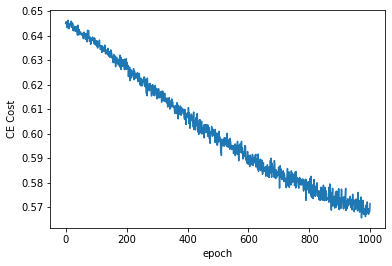

In [24]:
plt.plot(range(epochs), costs)
plt.ylabel('CE Cost')
plt.xlabel('epoch')

In [25]:
with torch.no_grad():
    y_pred = model(cat_test, con_test)
    cost = criterion(y_pred, y_test)
print(f'Cross Entropy Loss: {cost:.8f}')
    

Cross Entropy Loss: 0.70879358


In [27]:
rows = 2000
correct = 0
print(f'{"Model output":36} ARGMAX    Y_test')
for i in range(rows):
    print(f'{str(y_pred[i]):36}  {y_pred[i].argmax():^7}{y_test[i]:^7}')
    if y_pred[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')


Model output                         ARGMAX    Y_test
tensor([1.7831e-07, 1.0000e+00])         1      0   
tensor([0.0124, 0.9876])                 1      0   
tensor([0.6032, 0.3968])                 0      1   
tensor([1.0000e+00, 2.4250e-06])         0      0   
tensor([9.9987e-01, 1.2982e-04])         0      1   
tensor([0.9962, 0.0038])                 0      0   
tensor([0.0363, 0.9637])                 1      1   
tensor([0.8049, 0.1951])                 0      0   
tensor([0.0372, 0.9628])                 1      1   
tensor([0.9530, 0.0470])                 0      1   
tensor([0.9687, 0.0313])                 0      0   
tensor([0.8706, 0.1294])                 0      0   
tensor([0.9974, 0.0026])                 0      1   
tensor([0.9389, 0.0611])                 0      1   
tensor([5.3440e-05, 9.9995e-01])         1      1   
tensor([0.6453, 0.3547])                 0      1   
tensor([7.2094e-05, 9.9993e-01])         1      0   
tensor([0.1375, 0.8625])                 1   

tensor([0.7598, 0.2402])                 0      1   
tensor([0.0011, 0.9989])                 1      1   
tensor([0.1899, 0.8101])                 1      0   
tensor([0.0683, 0.9317])                 1      1   
tensor([0.9943, 0.0057])                 0      1   
tensor([0.0050, 0.9950])                 1      1   
tensor([0.0063, 0.9937])                 1      1   
tensor([9.5809e-05, 9.9990e-01])         1      1   
tensor([1.4188e-04, 9.9986e-01])         1      1   
tensor([2.5456e-05, 9.9997e-01])         1      1   
tensor([0.1959, 0.8041])                 1      1   
tensor([8.6469e-09, 1.0000e+00])         1      1   
tensor([0.7593, 0.2407])                 0      1   
tensor([1.6745e-06, 1.0000e+00])         1      1   
tensor([0.0014, 0.9986])                 1      1   
tensor([4.2050e-04, 9.9958e-01])         1      1   
tensor([0.0059, 0.9941])                 1      1   
tensor([6.5148e-07, 1.0000e+00])         1      1   
tensor([7.5905e-09, 1.0000e+00])         1    

tensor([0.0290, 0.9710])                 1      1   
tensor([0.0050, 0.9950])                 1      1   
tensor([0.0061, 0.9939])                 1      1   
tensor([0.0436, 0.9564])                 1      1   
tensor([3.4883e-06, 1.0000e+00])         1      1   
tensor([0.9986, 0.0014])                 0      1   
tensor([0.0066, 0.9934])                 1      1   
tensor([2.9764e-05, 9.9997e-01])         1      1   
tensor([1.9008e-07, 1.0000e+00])         1      1   
tensor([9.9957e-01, 4.3328e-04])         0      0   
tensor([9.9923e-01, 7.7237e-04])         0      0   
tensor([0.9228, 0.0772])                 0      1   
tensor([0.3331, 0.6669])                 1      0   
tensor([0.2366, 0.7634])                 1      1   
tensor([0.5085, 0.4915])                 0      1   
tensor([0.9859, 0.0141])                 0      1   
tensor([0.0796, 0.9204])                 1      0   
tensor([0.9908, 0.0092])                 0      1   
tensor([0.4108, 0.5892])                 1    

tensor([0.7510, 0.2490])                 0      0   
tensor([0.9490, 0.0510])                 0      0   
tensor([0.9563, 0.0437])                 0      0   
tensor([0.7974, 0.2026])                 0      0   
tensor([0.0125, 0.9875])                 1      1   
tensor([0.9732, 0.0268])                 0      0   
tensor([0.0905, 0.9095])                 1      1   
tensor([0.8456, 0.1544])                 0      0   
tensor([0.9921, 0.0079])                 0      1   
tensor([6.6113e-07, 1.0000e+00])         1      0   
tensor([0.1398, 0.8602])                 1      0   
tensor([1.0000e+00, 3.5702e-10])         0      1   
tensor([0.7006, 0.2994])                 0      0   
tensor([0.9961, 0.0039])                 0      0   
tensor([9.9953e-01, 4.7389e-04])         0      0   
tensor([0.0029, 0.9971])                 1      0   
tensor([0.4713, 0.5287])                 1      1   
tensor([2.2649e-04, 9.9977e-01])         1      0   
tensor([0.9195, 0.0805])                 0    

tensor([9.9975e-01, 2.5443e-04])         0      0   
tensor([0.9837, 0.0163])                 0      0   
tensor([0.5397, 0.4603])                 0      0   
tensor([0.2129, 0.7871])                 1      0   
tensor([0.1189, 0.8811])                 1      0   
tensor([1.0000e+00, 2.3090e-09])         0      1   
tensor([0.9485, 0.0515])                 0      0   
tensor([0.2602, 0.7398])                 1      1   
tensor([0.0546, 0.9454])                 1      0   
tensor([0.2390, 0.7610])                 1      1   
tensor([3.2781e-04, 9.9967e-01])         1      1   
tensor([2.5711e-05, 9.9997e-01])         1      0   
tensor([0.9987, 0.0013])                 0      0   
tensor([0.8950, 0.1050])                 0      1   
tensor([0.6243, 0.3757])                 0      0   
tensor([9.9999e-01, 1.0782e-05])         0      0   
tensor([9.9981e-01, 1.8984e-04])         0      1   
tensor([0.9974, 0.0026])                 0      1   
tensor([9.9993e-01, 7.4166e-05])         0    

tensor([0.1091, 0.8909])                 1      1   
tensor([0.8497, 0.1503])                 0      0   
tensor([0.4472, 0.5528])                 1      1   
tensor([0.1511, 0.8489])                 1      1   
tensor([4.3543e-09, 1.0000e+00])         1      0   
tensor([0.4888, 0.5112])                 1      1   
tensor([0.8913, 0.1087])                 0      0   
tensor([0.3003, 0.6997])                 1      1   
tensor([0.2945, 0.7055])                 1      1   
tensor([5.3824e-04, 9.9946e-01])         1      1   
tensor([0.0255, 0.9745])                 1      0   
tensor([0.4522, 0.5478])                 1      1   
tensor([0.0494, 0.9506])                 1      0   
tensor([0.0205, 0.9795])                 1      0   
tensor([0.8310, 0.1690])                 0      1   
tensor([0.5560, 0.4440])                 0      0   
tensor([0.5884, 0.4116])                 0      1   
tensor([5.7180e-04, 9.9943e-01])         1      1   
tensor([0.0386, 0.9614])                 1    